In [2]:
import os
import pandas as pd
import geopandas
from shapely import geometry
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray
import contextily as cx
# import seaborn as sns
import rasterio
from shapely.wkt import loads

/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/spatial_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load data

In [2]:
type_of_data = "land_use"

current_dir = os.getcwd()
datasetdir = os.path.join(current_dir, '../data/raw', type_of_data)
path = os.path.join(datasetdir, "LGN2012/LGN7.tif")

In [5]:
lgn = rioxarray.open_rasterio(path, masked=True)
print(lgn)

<xarray.DataArray (band: 1, y: 13000, x: 11200)> Size: 582MB
[145600000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 90kB 12.5 37.5 62.5 ... 2.799e+05 2.8e+05 2.8e+05
  * y            (y) float64 104kB 6.25e+05 6.25e+05 6.249e+05 ... 3e+05 3e+05
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_SOFTWARE:  GRASS GIS 7.8.2 with GDAL 3.0.4
    AREA_OR_POINT:     Area
    scale_factor:      1.0
    add_offset:        0.0


## Check number and types of codes

In [6]:
# checking some basic characteristics of the dataset, like shape, and land codes.
print("Raster size:", lgn.shape)
print("Unique land use codes:", np.unique(lgn))

Raster size: (1, 13000, 11200)
Unique land use codes: [ 1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 16. 17. 18. 19. 20. 22. 23.
 24. 25. 26. 28. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43.
 45. 61. 62. nan]


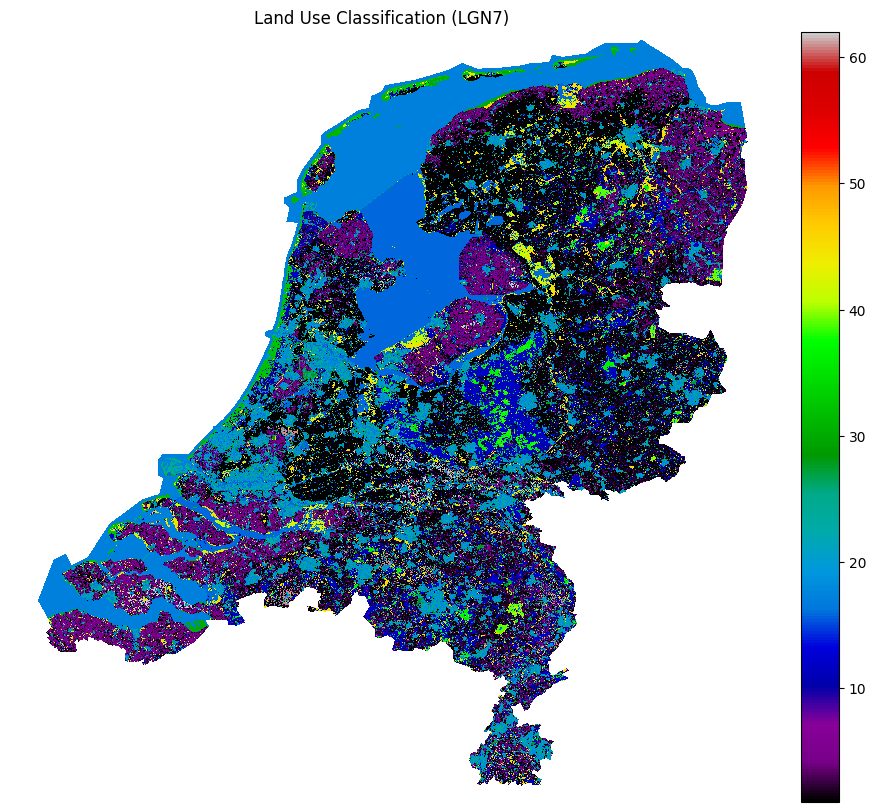

In [7]:
lgn.plot(cmap="nipy_spectral", figsize=(12, 10))
plt.title("Land Use Classification (LGN7)")
plt.axis("off")
plt.show()

## Changes in landuse through time

In [20]:
path = "/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/clean/aligned_data/merged_dataset_1.csv"
df = pd.read_csv(path)
len(df)

192

In [21]:
df = df.dropna(subset=["landuse code"])
len(df)

117

In [22]:
df = df.dropna(subset=["density_1"])
len(df)

82

In [23]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

In [26]:
landuse_by_point = df.groupby(['geometry', 'year'])['landuse code'].unique().reset_index()
landuse_by_point.head(76)

,geometry,year,landuse code
0,POINT (5.1406676 52.134344121),2012,[1.0]
1,POINT (5.1406676 52.134344121),2018,[1.0]
2,POINT (5.1406676 52.134344121),2019,[1.0]
3,POINT (5.1406676 52.134344121),2020,[1.0]
4,POINT (5.187673269 52.052827185),2012,[1.0]
...,...,...,...
71,POINT (5.580385464 51.97882674),2018,[1.0]
72,POINT (5.600793941 51.962453539),2012,[11.0]
73,POINT (5.600793941 51.962453539),2018,[27.0]
74,POINT (5.601761312 51.976104861),2012,[1.0]
